In [132]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [133]:
# import du csv dans le dataframe
df = pd.read_csv("../database/carprice-assignment-6447798486dfd210498974.csv", index_col=0)


In [134]:
# df.describe()l
# df.cov()
# df.corr()
# df.head(1)
#df.shape
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [135]:
# r = 6.382176e+07 / ( 7988.852332 * 6.886443	)
# r

In [136]:
# nettoyage des données
df[['marque', 'modele']] = df['CarName'].str.split(' ', n=1, expand=True)

#correction des noms des marques
df.replace(to_replace=['maxda'], value= 'mazda', inplace=True)
df.replace(to_replace=['vokswagen'], value= 'volkswagen', inplace=True)
df.replace(to_replace=['vw'], value= 'volkswagen', inplace=True)
df.replace(to_replace=['toyouta'], value= 'toyota', inplace=True)
df.replace(to_replace=['Nissan'], value= 'nissan', inplace=True)
df.replace(to_replace=['porcshce'], value= 'porsche', inplace=True)

#convertion des mesures
df['wheelbase'] = df['wheelbase'] * 2.54  # wheelbase : empattement en cm
df['carlength'] = df['carlength'] * 2.54  # carlength : longueur en cm
df['carwidth'] = df['carwidth'] * 2.54  # carwidth : largeur en cm
df['carheight'] = df['carheight'] * 2.54  # carheight : hauteur en cm
df['curbweight'] = df['curbweight'] * 0.453592  # curbweight : poids à vide en kg
df['enginesize'] = df['enginesize'] * 16.3871  # enginesize : cylindrée en cm³


/home/choux/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


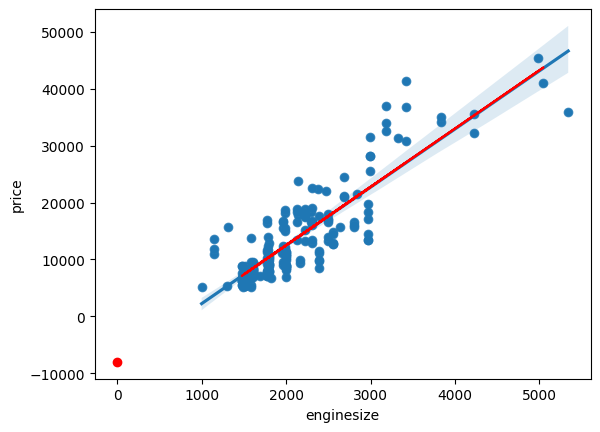

In [137]:
#creation du tablau seaborn

sns.scatterplot(data=df, x="enginesize", y="price")

regressor = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df[['enginesize']], df['price'], test_size=0.2, random_state=100)

# Ajuster le modèle en utilisant les données d'apprentissage
regressor.fit(X_train, y_train)
# Faire des prédictions en utilisant les données de test
y_pred = regressor.predict(X_test)


#affichage du tracer
sns.regplot(x='enginesize', y='price', data=df)
plt.plot(X_test, y_pred, color='red')
plt.scatter(1, regressor.predict([[1]]), color='red')


In [138]:
model = LinearRegression()
# model.fit(X,y)
# model.score(X,y)
# model.predict(X,y)


NameError: name 'X' is not defined